In [2]:
#getting all the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
#data file
# file_txt = pd.read_csv('kepler5-b_transit.txt')
# file_txt.to_csv('data_transit.csv' , index=None)
# file_txt = pd.read_csv('kepler5b_steller.txt')
# file_txt.to_csv('data_radial.csv' , index=None)

In [5]:
data_transit = pd.read_csv('data_transit.csv' , header=None)
data_transit.columns = ["Data"]
data_transit

,Data
0,2454953.538373 1.000174
1,2454953.558807 1.000038
2,2454953.579242 1.000179
3,2454953.599676 1.000335
4,2454953.620111 1.000013
...,...
2097,2454997.901531 0.999957
2098,2454997.921966 0.999833
2099,2454997.942400 0.999837
2100,2454997.962835 1.000386


In [9]:
data_radial = pd.read_csv('data_radial.csv',header=None)
data_radial.columns = ['Data']
data_radial

,Data
0,2454987.097346 164.10 7.21 -12.6 8....
1,2454988.087549 -162.44 6.65 3.3 4....
2,2454989.029185 -239.65 7.54 -17.2 6....
3,2455014.922447 114.26 6.10 4.2 6....
4,2455016.023323 46.39 6.36 -7.1 5....
5,2455017.076975 -263.88 6.28 -5.5 5....
6,2455075.809062 167.19 6.19 -61.8 10....
7,2455110.814132 172.90 6.25 8.2 16....


#data cleaning and header removing

In [16]:
#spliting the data
data_transit[["HDJ" , "Norm_Flux"]] = data_transit.Data.str.split(expand = True)
data = data.drop('Data' , 1)
#convert the values into float
data['HDJ'] = data['HDJ'].astype(str).astype(float)
data['Norm_Flux'] = data['Norm_Flux'].astype(str).astype(float)
# data.dtypes
data["Mod_HDJ"] = data["HDJ"]%3.54
data = data.drop('HDJ',1)
data

,Norm_Flux,Mod_HDJ
0,1.000174,2.478373
1,1.000038,2.498807
2,1.000179,2.519242
3,1.000335,2.539676
4,1.000013,2.560111
...,...,...
2097,0.999957,0.821531
2098,0.999833,0.841966
2099,0.999837,0.862400
2100,1.000386,0.882835


In [17]:
#cleaning other values
data.isna().sum()

Norm_Flux    0
Mod_HDJ      0
dtype: int64

In [18]:
data.dtypes

Norm_Flux    float64
Mod_HDJ      float64
dtype: object

Plotting Lightcurves

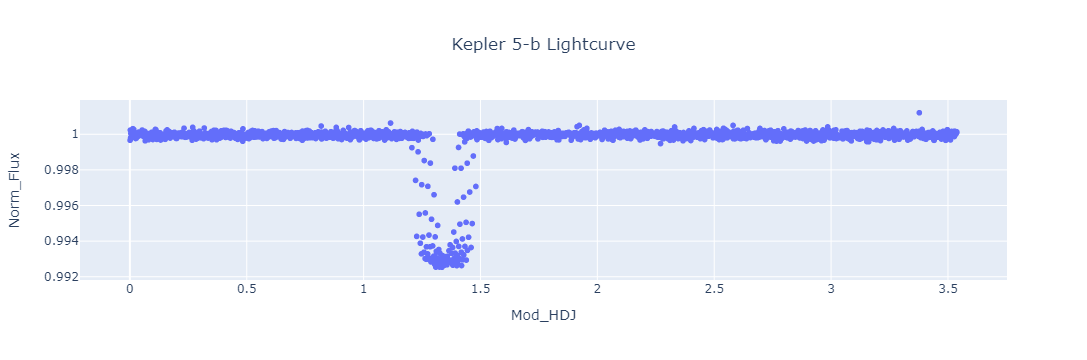

In [20]:
fig = px.scatter(data , x="Mod_HDJ" , y="Norm_Flux",title="Kepler 5-b Lightcurve")
fig.update(layout = dict(title = dict(x=0.5)))
# fig.show()